In [48]:
#importing the necessary file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA




In [49]:
data= pd.read_csv('/content/AirPassengers.csv')

In [50]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [51]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [52]:
data.shape

(144, 2)

In [53]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [55]:
data["Month"]=pd.to_datetime(data["Month"])
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [57]:
data.index=data["Month"]
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [58]:
del data["Month"]

In [59]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

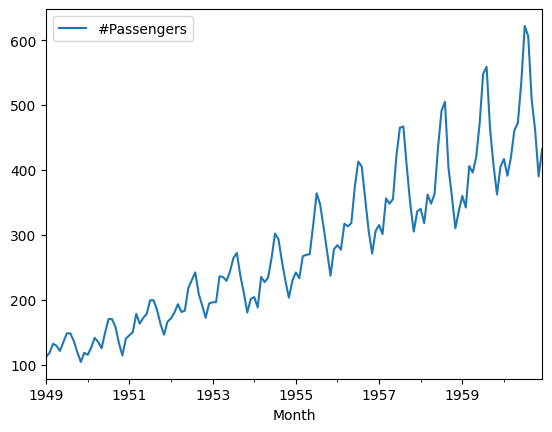

In [60]:
#plotting the time series
data.plot()

In [61]:
data.shape

(144, 1)

In [62]:
mean_log= data.rolling(window=24).mean()
std_log=data.rolling(window=24).std()

Text(0.5, 1.0, 'rolling mean & std (log scale)')

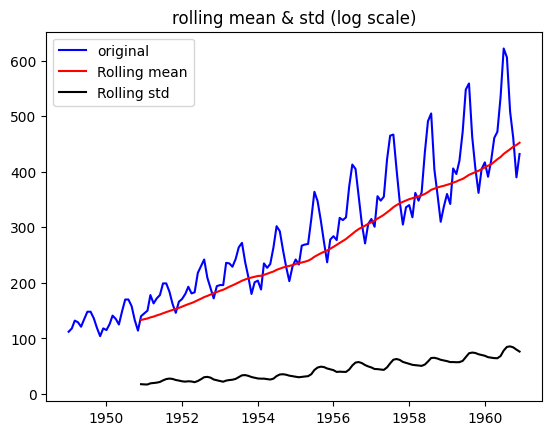

In [63]:
plt.plot(data,color="blue",label="original")
plt.plot(mean_log,color="red",label="Rolling mean")
plt.plot(std_log,color="black", label="Rolling std")
plt.legend(loc="best")
plt.title("rolling mean & std (log scale)")

before building a time series,we need to make sure tht the time series is stationary.we need to convert myt time series into stationay ,by differencing. ARIMA...

NON-STAtionary-- presence of trend,presence of autocorelation.
how we identify--- we would be doing a statistical test---augumnted dicky-fuller test

Null hypothesis:the time series is not stationary
Alternative hypothesis-- time series is stationary

In [64]:
#checking the stationary of the series
from statsmodels.tsa.stattools import adfuller
result=adfuller(data["#Passengers"])
print(result)

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [65]:
result=adfuller(data['#Passengers'].diff().dropna())
result

(-2.8292668241700047,
 0.05421329028382478,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

<Axes: xlabel='Month'>

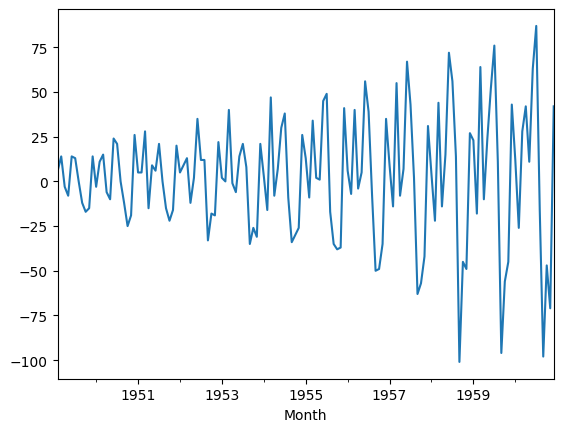

In [66]:
data["#Passengers"].diff().dropna().plot()

<Axes: xlabel='Month'>

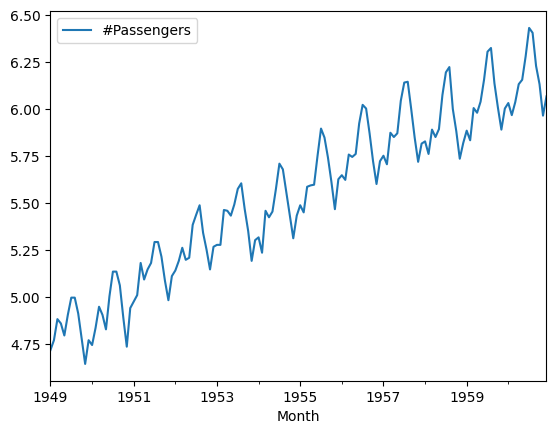

In [67]:
#logarithm computation to make it stationary
first_log=np.log(data)
first_log=first_log.dropna()
first_log.plot()

In [68]:
#checking the stationary of time series
from statsmodels.tsa.stattools import adfuller
result=adfuller(first_log["#Passengers"])
print(result)


(-1.7170170891069683, 0.4223667747703874, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -445.3990312497209)


Text(0.5, 1.0, 'rolling mean & std (log scale)')

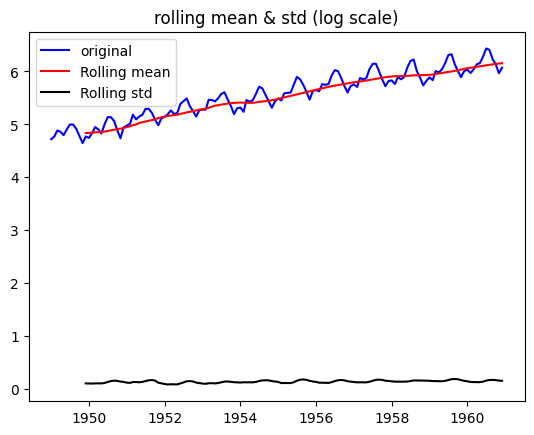

In [69]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

plt.plot(first_log,color="blue",label="original")
plt.plot(mean_log,color="red",label="Rolling mean")
plt.plot(std_log,color="black", label="Rolling std")
plt.legend(loc="best")
plt.title("rolling mean & std (log scale)")

In [70]:
new_data=first_log-mean_log
new_data=new_data.dropna()


In [71]:
#adfuller test
result=adfuller(new_data["#Passengers"])
print(result)

(-3.1629079913008833, 0.022234630001242206, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)


Text(0.5, 1.0, 'rolling mean & std (log scale)')

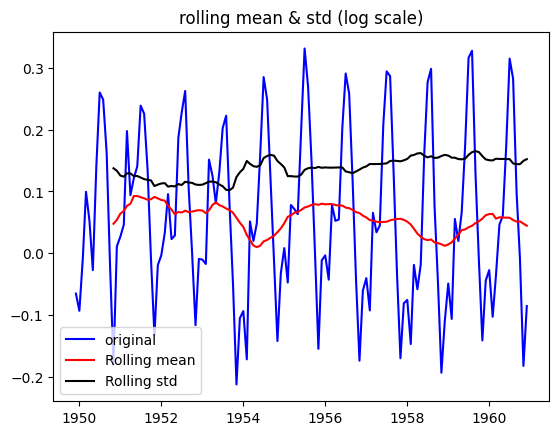

In [72]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color="blue",label="original")
plt.plot(mean_log,color="red",label="Rolling mean")
plt.plot(std_log,color="black", label="Rolling std")
plt.legend(loc="best")
plt.title("rolling mean & std (log scale)")

ACF and PACF plots which are used to identify the models oder in ARIMA MODELS. these plots helps to find the parameter p and q.
we actuallyn plot ACF and PACF after making my model stationary.


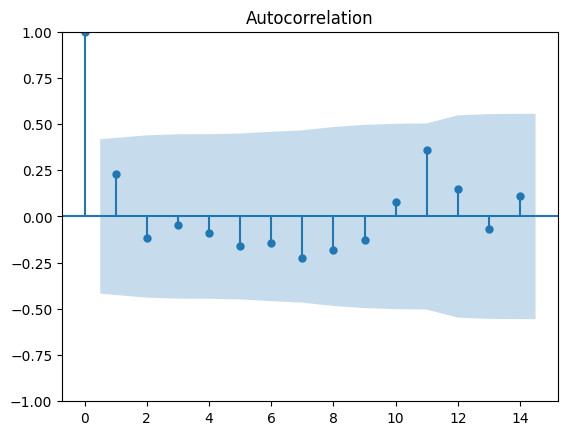

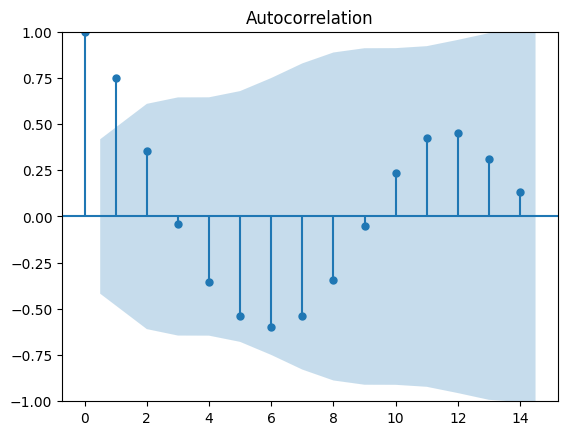

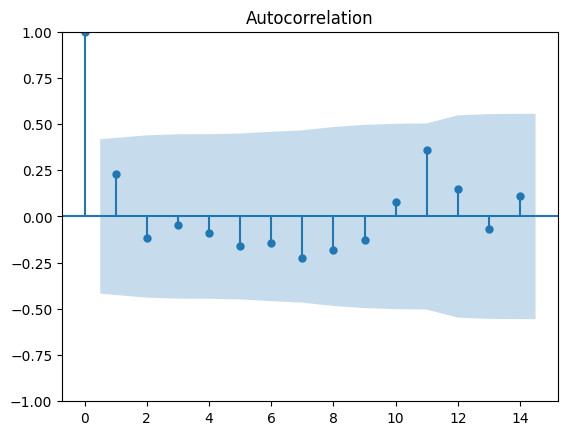

In [73]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(new_data)
pacf_plot=pacf(new_data)
plot_acf(acf_plot)
plot_acf(pacf_plot)

In [74]:
from statsmodels.tsa.arima.model import ARIMA
train=new_data.iloc[:120]["#Passengers"]
test=new_data.iloc[120:]["#Passengers"]
model=ARIMA(train,order=(1,0,2))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [75]:
new_data["predict"]=model_fit.predict(start=2,end=len(train)+len(test)-1,dynamic=True)
new_data[["#Passengers","predict"]]

,#Passengers,predict
Month,,
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,-0.036666
1950-03-01,0.099416,0.018961
1950-04-01,0.052142,0.038727
...,...,...
1960-08-01,0.282363,0.053777
1960-09-01,0.098235,0.053777
1960-10-01,-0.009230,0.053777


<Axes: xlabel='Month'>

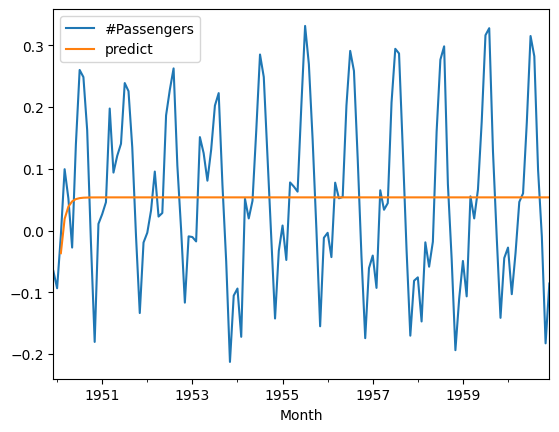

In [76]:
new_data[["#Passengers","predict"]].plot()


In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
model=SARIMAX(train,order =(1,0,2),seasonal_order=(1,0,2,12))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

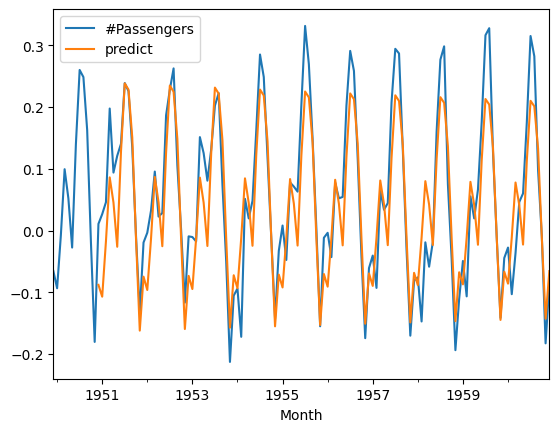

In [78]:
new_data["predict"]=model.predict(start=12,end=len(train)+len(test)-1,dynamic=True)
new_data[["#Passengers","predict"]].plot()

<Axes: xlabel='Month'>

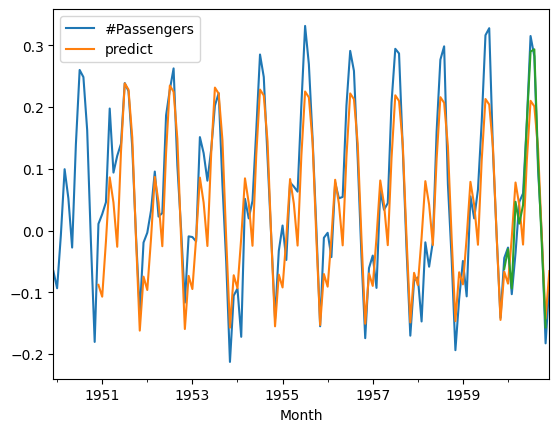

In [79]:
#predicting the projection for next years
forecast=model.forecast(steps=12)
new_data.plot()
forecast.plot()

In [82]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
predict_df=new_data[120:131]
mean_squared_error(predict_df["#Passengers"],predict_df["predict"])


0.005000877864493523